<a href="https://colab.research.google.com/github/xd-SYSNBO/finalcodeexam/blob/main/Final_code_for_modelling_and_simulation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[  1   5  11  19]
 [ 29  41  55  71]
 [ 89 109 131 155]]
Minimum value of y: 6.0
Occurs at x = -2.0000000000000284


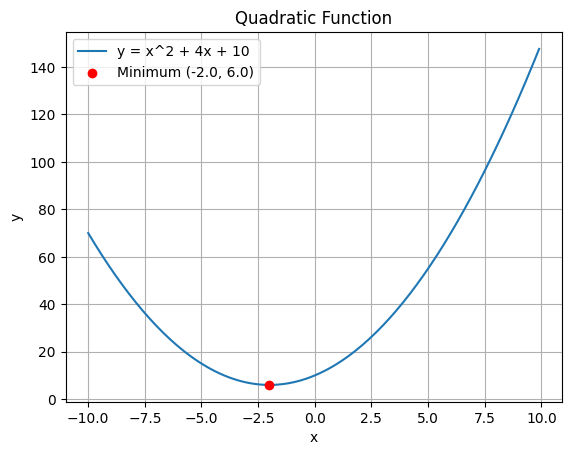

DataFrame:
           a         b         c         d
1  0.754028 -2.408738 -0.344963  2.075542
2  0.570311  0.419141  0.773904 -0.156465
3  2.881560 -1.247802 -0.269652  1.119543
4  2.038827 -1.565222 -0.167658  0.798051

Element using .loc: 0.7739040714326044
Element using .iloc: 0.7739040714326044
Element using direct index access: 0.7739040714326044


IntSlider(value=1000, description='Iterations:', max=50000, min=1000, step=100)

Output()

Number of rows: 55
Column names: ['Close', 'High', 'Low', 'Open', 'Volume']
April 11th row(s):
                  Close        High         Low        Open    Volume
Date                                                                
2025-04-11  198.149994  199.539993  186.059998  186.100006  87435900
Highest stock value on April 11th: 87435900.0


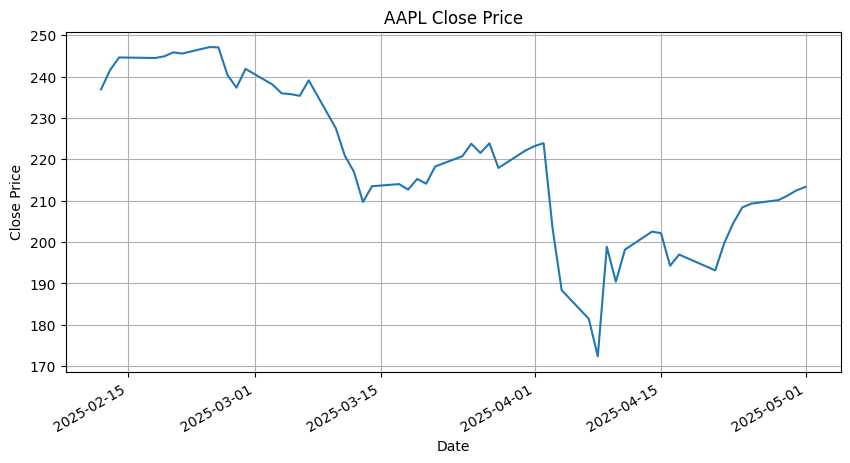

In [ ]:
#Question 2

import numpy as np

a = np.arange(0, 12)
a = a**2 + 3*a + 1
a = a.reshape(3, 4)
print(a)


#Question 4
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.arange(-10, 10, 0.1)

# Calculate y values
y = x**2 + 4*x + 10

# Find the minimum value and where it occurs
min_index = np.argmin(y)
x_min = x[min_index]
y_min = y[min_index]

print("Minimum value of y:", y_min)
print("Occurs at x =", x_min)

# Plotting
plt.plot(x, y, label='y = x^2 + 4x + 10')
plt.scatter(x_min, y_min, color='red', zorder=5, label=f'Minimum ({x_min:.1f}, {y_min:.1f})')
plt.title('Quadratic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#Question 6

import numpy as np
import pandas as pd

# Create the DataFrame
df = pd.DataFrame(np.random.randn(4, 4), index=[1, 2, 3, 4], columns=['a', 'b', 'c', 'd'])
print("DataFrame:\n", df)

# Choose row index 2 and column 'c'
row_label = 2      # This is the label, not the position
col_label = 'c'    # Column label

# 1. Using .loc (label-based)
element_loc = df.loc[row_label, col_label]

# 2. Using .iloc (position-based)
# Row index 2 is the second row (Python index 1), column 'c' is the third column (Python index 2)
element_iloc = df.iloc[1, 2]

# 3. Using direct index access (equivalent to .loc)
element_index = df['c'][row_label]

# Display the results
print("\nElement using .loc:", element_loc)
print("Element using .iloc:", element_iloc)
print("Element using direct index access:", element_index)

#Question 7

import random
from collections import Counter
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, interactive_output
from IPython.display import display
import numpy as np

# Card and Deck classes
class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, value, suit):
        self.value = value
        self.suit = suit

    def __repr__(self):
        return f"{self.value} of {self.suit}"

class Deck:
    def __init__(self):
        self.cards = [Card(value, suit) for suit in Card.suits for value in Card.values]

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self, count):
        drawn = self.cards[:count]
        self.cards = self.cards[count:]
        return drawn

# Check if hand is Three of a Kind
def is_three_of_a_kind(hand):
    values = [card.value for card in hand]
    counts = Counter(values)
    return 3 in counts.values()

# Simulation function with plotting and printing
def simulate_three_of_a_kind(num_iterations):
    three_count = 0
    probabilities = []

    for i in range(1, num_iterations + 1):
        deck = Deck()
        deck.shuffle()
        hand = deck.draw(5)
        if is_three_of_a_kind(hand):
            three_count += 1
        prob = (three_count / i) * 100
        probabilities.append(prob)

    plt.figure(figsize=(10,6))
    plt.plot(range(1, num_iterations + 1), probabilities, label='Three of a Kind Probability (%)')
    plt.xlabel('Number of Draws')
    plt.ylabel('Probability (%)')
    plt.title('Probability of Drawing Three of a Kind Over Iterations')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Final estimated probability of drawing Three of a Kind after {num_iterations} iterations: {probabilities[-1]:.4f}%")

# Create slider widget
slider = IntSlider(value=1000, min=1000, max=50000, step=100, description='Iterations:')

# Link slider to simulation function
out = interactive_output(simulate_three_of_a_kind, {'num_iterations': slider})

# Display slider and output
display(slider, out)


#Question 8

import requests
import pandas as pd
import matplotlib.pyplot as plt

# Download the data
ticker = "AAPL"
url = f"https://raw.githubusercontent.com/itb-ie/midterm_data/refs/heads/main/{ticker}.csv"
with open("company.csv", "w") as f:
    f.write(requests.get(url).text)

# Read the CSV, parse the date index properly
df = pd.read_csv("company.csv", index_col="Date", parse_dates=True)

# 1. Number of rows
print("Number of rows:", len(df))

# 2. Column names
print("Column names:", df.columns.tolist())

# 3. Highest stock value on April 11th (regardless of year)
# Let's search for any April 11th in the index
april_11 = df[df.index.strftime('%m-%d') == '04-11']

if not april_11.empty:
    print("April 11th row(s):\n", april_11)
    print("Highest stock value on April 11th:", april_11.max().max())
else:
    print("No data for April 11th found in the DataFrame.")

# 4. Plot a column (e.g., 'Close')
plt.figure(figsize=(10,5))
df['Close'].plot(title=f"{ticker} Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

